In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
results = pd.read_csv('international-games/results.csv')
shootouts = pd.read_csv('international-games/shootouts.csv')

results['date'] = pd.to_datetime(results['date'])
results['year'] = results['date'].dt.year
results['date'] = results['date'].dt.date

shootouts['date'] = pd.to_datetime(shootouts['date'])
shootouts['year'] = shootouts['date'].dt.year
shootouts['date'] = shootouts['date'].dt.date

In [4]:
print(results.info())
results.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47980 entries, 0 to 47979
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        47980 non-null  object
 1   home_team   47980 non-null  object
 2   away_team   47980 non-null  object
 3   home_score  47980 non-null  int64 
 4   away_score  47980 non-null  int64 
 5   tournament  47980 non-null  object
 6   city        47980 non-null  object
 7   country     47980 non-null  object
 8   neutral     47980 non-null  bool  
 9   year        47980 non-null  int32 
dtypes: bool(1), int32(1), int64(2), object(6)
memory usage: 3.2+ MB
None


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
47975,2024-12-31,Oman,Saudi Arabia,2,1,Gulf Cup,Sulaibikhat,Kuwait,True,2024
47976,2024-12-31,Kuwait,Bahrain,0,1,Gulf Cup,Kuwait City,Kuwait,False,2024
47977,2025-01-02,Vietnam,Thailand,2,1,ASEAN Championship,Việt Trì,Vietnam,False,2025
47978,2025-01-04,Oman,Bahrain,1,2,Gulf Cup,Kuwait City,Kuwait,True,2025
47979,2025-01-05,Thailand,Vietnam,2,3,ASEAN Championship,Bangkok,Thailand,False,2025


In [5]:
print(shootouts.info())
shootouts.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           645 non-null    object
 1   home_team      645 non-null    object
 2   away_team      645 non-null    object
 3   winner         645 non-null    object
 4   first_shooter  230 non-null    object
 5   year           645 non-null    int32 
dtypes: int32(1), object(5)
memory usage: 27.8+ KB
None


,date,home_team,away_team,winner,first_shooter,year
640,2024-07-05,Venezuela,Canada,Canada,Venezuela,2024
641,2024-07-06,England,Switzerland,England,England,2024
642,2024-07-06,Uruguay,Brazil,Uruguay,Uruguay,2024
643,2024-07-13,Canada,Uruguay,Uruguay,Canada,2024
644,2024-09-08,Tajikistan,Philippines,Tajikistan,NaN,2024


### Percentage of team wins in shootouts

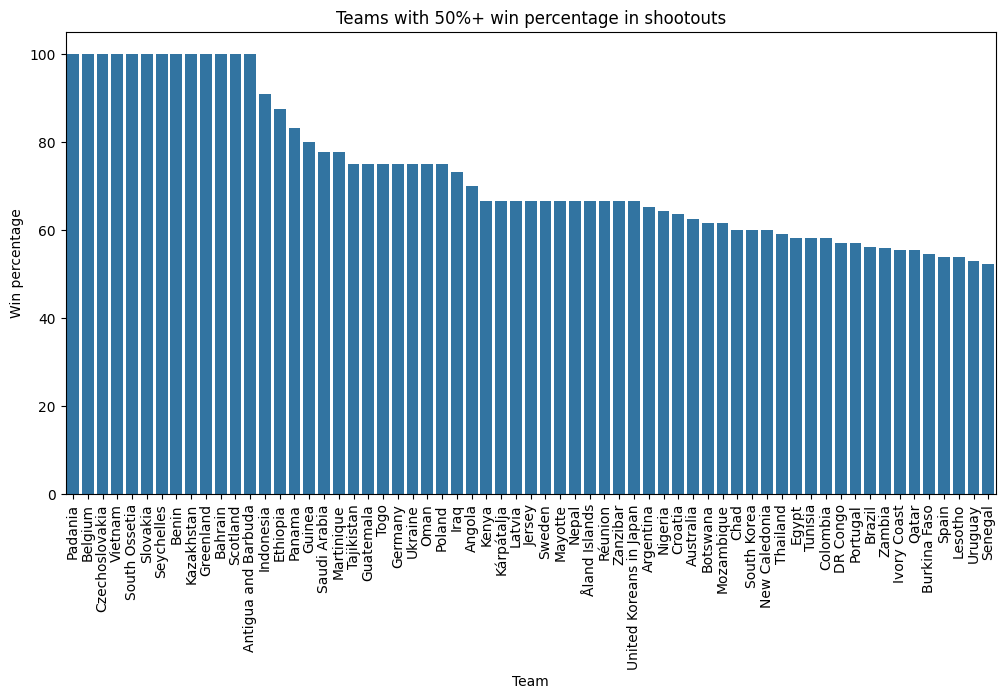

In [ ]:
shootout_wins = shootouts['winner'].value_counts()
shootout_appereances = shootouts['home_team'].value_counts() + shootouts['away_team'].value_counts()
shootout_win_percentage = ((shootout_wins / shootout_appereances) * 100).round(2)
shootout_win_percentage = shootout_win_percentage.sort_values(ascending=False)

shootout_appereances = shootout_appereances.to_frame().reset_index()
shootout_appereances.columns = ['team', 'appearances']

shootout_win_percentage = shootout_win_percentage.to_frame().reset_index()
shootout_win_percentage.columns = ['team', 'win_percentage']
shootout_win_percentage['win_percentage'] = shootout_win_percentage['win_percentage'].fillna(0)

shootout_win_percentage = shootout_win_percentage.merge(shootout_appereances, on='team')
shootout_win_percentage.dropna(inplace=True)


top_teams = shootout_win_percentage[shootout_win_percentage['win_percentage'] > 50]
plt.figure(figsize=(12, 6))
sns.barplot(data=top_teams, x='team', y='win_percentage')
plt.title('National Teams with above average win percentage in shootouts')
plt.ylabel('Win percentage')
plt.xlabel('Team')
plt.xticks(rotation=90)
plt.show()